Customer segmentation models often used for dividinng a company's clients into different user groups. Customers in each group display shared characteristics that distinguish them from other users. In this work we'll be using https://www.kaggle.com/datasets/carrie1/ecommerce-data?resource=download E-Commerce data from Kaggle. We'll prepera the data  for customer segmentation and to build a K-Means algorithm from scratch. We will also look at how RFM is used in marketing to analyze customer value and explore other metrics for evaluating the performance of a clustering algorithm.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
"""
Bartu AKKUŞ
巴尔图白鸟
"""

'\nBartu AKKUŞ\n巴尔图白鸟\n'

after importing necessary libraries we are going to load our dataset

In [3]:
df=pd.read_csv('segmentation.csv')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


The dataframe includes 8 variables: 
Invoice No: Is a unique variable of each customer.
StockCode: The unique identifier of each item in stock.
Description: The item purchased by the customer.
Quantity: The number of each item purchased by a customer in a single invoice.
InvoiceDate: The purchase date.
UnitPrice: Price of one unit of each item.
CustomerID: Unique identifier assigned to each user.
Country: The country from where the purchase was made.

In [5]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


as we can see we have no NULL variables in out dataset!

In our work we're going to use RFM analysis

# What is RFM Analysis

RFM method, which is a segmentation analysis, was needed for companies not to lose existing customers and to determine the 
expectations of the real needs of the best customers (loyal customers). RFM analysis is used by companies to implement the best 
marketing strategies for their customers. R represents the customers how recently have they made a purchase. F represents how often they buy something and M represents 

# Recency

In [7]:
df['Date']= pd.to_datetime(df['InvoiceDate'])
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['rank']==1]

In [8]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

<ipython-input-8-6ccb90a19d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1


# Frequency 

Calculating how many times has each customer made a purchase on platform

In [10]:
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']

In [11]:
rec_freq = df_freq.merge(df_rec,on='CustomerID')

# Monetary Value

In [12]:
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']

In [13]:
rfm = m.merge(rec_freq,on='CustomerID')

In [16]:
finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]

We succesfully built our 3 meaningful variables. Before building the model, we need to remove outliers.

recency: 


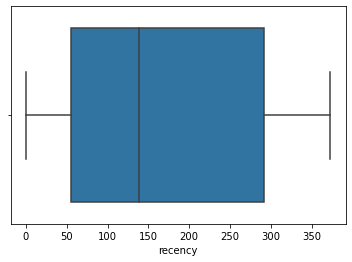

frequency: 


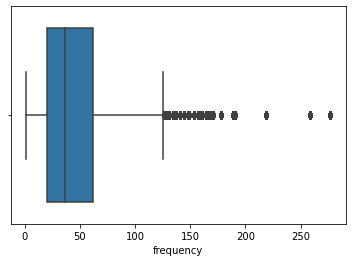

monetary_value: 


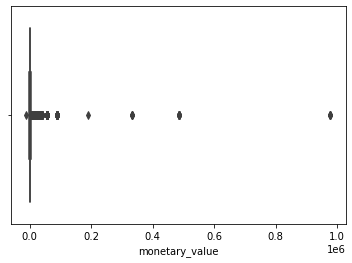

In [17]:
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

above we can observe that recency value has no outliers. Frequency and monetary values has too many outliers.

To identify outliers, we will compute a measurement called a Z-Score. Z-Scores tell us how far away from the mean a data point is. A Z-Score of 3, for instance, means that a value is 3 standard deviations away from the variable’s mean.

In [20]:
from scipy import stats
import numpy as np
# removing the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]
# removing outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

# Standardization

The final pre-processing technique we will apply to the dataset is standardization.

In [24]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

# Building Customer Segmentation Model

When building a clustering model, we need to decide how many segments we want to group the data into. 

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Text(0, 0.5, 'Inertia')

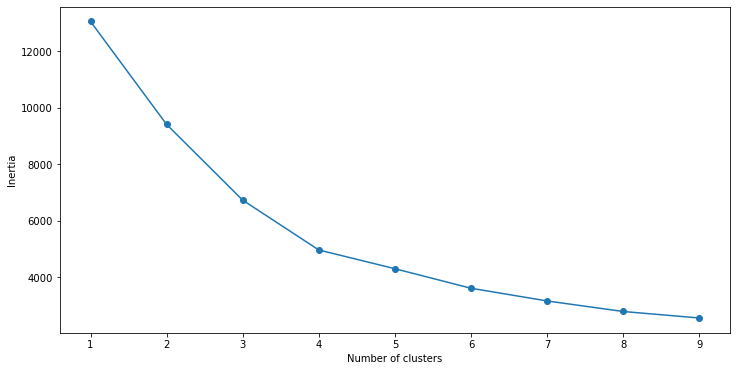

In [29]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [30]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [31]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4360722849503388


# Segmentation Model Intrepretatiton and Visualization

In [32]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

now we should visualize our dataset to identify the distinct traits of customers in each segment.

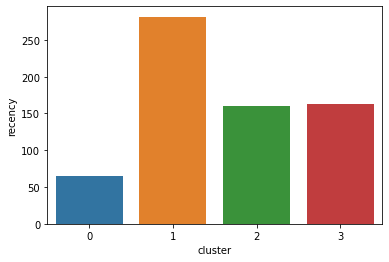

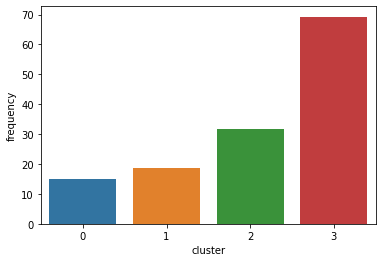

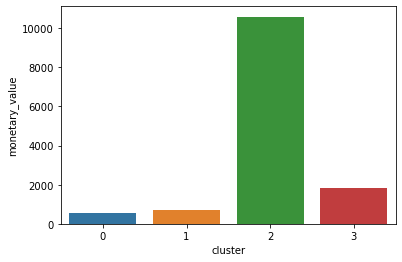

In [33]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

Just by looking at the charts above, we can identify the following attributes of customers in each segment